<div style="border-radius: 15px; border: 2px solid #8e44ad; padding: 20px; background: linear-gradient(135deg, #d9b3e6, #c39bd3, #8e44ad); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 10px; font-size: 36px; font-family: 'Roboto', sans-serif;">
        🍄 Mushroom Classifier: Edible or Poisonous? 🚦🔍
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">


#### 📝 **Dataset Overview**  

The dataset comprises **54,035 rows** and **9 columns**, each representing distinct **physical** and **seasonal** characteristics of mushrooms. The primary objective is to classify mushrooms as either **✅ edible (class = 0)** or **☠️ poisonous (class = 1)** based on their morphological and seasonal attributes. The dataset contains a mix of **continuous** and **categorical** features, all of which have been encoded numerically.  

#### 📊 **Columns in the Dataset**  

| 🏷️ **Feature**          | 🔢 **Type**  | 📄 **Description**                                                      |
|--------------------------|--------------|------------------------------------------------------------------------|
| **Cap Diameter** (`cap-diameter`)  | `float64`    | 📏 Measures the diameter of the mushroom cap (continuous).              |
| **Cap Shape** (`cap-shape`)        | `int64`      | 🔵 Represents the shape of the mushroom cap (encoded as integers).      |
| **Gill Attachment** (`gill-attachment`) | `int64`  | 🪶 Indicates how the gills attach to the stem (encoded as integers).    |
| **Gill Color** (`gill-color`)      | `int64`      | 🎨 Represents the color of the gills (encoded as integers).             |
| **Stem Height** (`stem-height`)    | `float64`    | 📏 Measures the height of the mushroom stem (continuous).               |
| **Stem Width** (`stem-width`)      | `float64`    | 📐 Represents the width of the mushroom stem (continuous).              |
| **Stem Color** (`stem-color`)      | `int64`      | 🎨 Indicates the color of the stem (encoded as integers).               |
| **Season** (`season`)              | `float64`    | 🌱 Indicates the season in which the mushroom grows (encoded numerically). |
| **Target Class** (`class`)         | `int64`      | 🍽️ **0**: Edible mushrooms  <br> ☠️ **1**: Poisonous mushrooms         |  

### 🎯 **Objective**  

The goal of this dataset is to develop a **machine learning model** that can accurately classify mushrooms as **✅ edible** or **☠️ poisonous** based on their features. This classification is essential for ensuring **safety** when identifying wild mushrooms, as misidentifying poisonous mushrooms can have severe health consequences.

### 🛠️ **Key Tasks**

1. **🔍 Data Analysis**: Explore feature distributions and relationships.
2. **🧹 Preprocessing**: Handle missing values, duplicates, scaling, and transformations.
3. **🤖 Model Building**: Train classifiers like **XGBoost** and optimize with **Optuna**.
4. **📈 Evaluation**: Measure model performance using metrics like **Accuracy**, **AUC**, **Classification Report**, and **Confusion Matrix**.
5. **🧠 Feature Interpretation**: Identify the most influential features for classification.

This analysis aims to deliver a **reliable and interpretable model** for mushroom classification while offering insights into the distinguishing characteristics between edible and poisonous mushrooms. 🍄

# <span style="color:transparent;">Imports and Setup</span>

<div style="border-radius: 15px; border: 2px solid #8e44ad; padding: 20px; background: linear-gradient(135deg, #d9b3e6, #c39bd3, #8e44ad); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 10px; font-size: 36px; font-family: 'Roboto', sans-serif;">
        Imports and Setup
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# <span style="color:transparent;">Load and Explore Dataset</span>

<div style="border-radius: 15px; border: 2px solid #8e44ad; padding: 20px; background: linear-gradient(135deg, #d9b3e6, #c39bd3, #8e44ad); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 10px; font-size: 36px; font-family: 'Roboto', sans-serif;">
        Load and Explore Dataset
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">


In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/mushroom-dataset/mushroom_cleaned.csv')

In [3]:
# Display basic information about the dataset
print("Shape of the dataset:", df.shape)
display(df.head())
print("\nDataset Information:")
print(df.info())
print("\nStatistical Summary:")
display(df.describe().T)

Shape of the dataset: (54035, 9)


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB
None

Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
cap-diameter,54035.0,567.257204,359.883763,0.000000,289.000000,525.000000,781.000000,1891.000000
cap-shape,54035.0,4.000315,2.160505,0.000000,2.000000,5.000000,6.000000,6.000000
gill-attachment,54035.0,2.142056,2.228821,0.000000,0.000000,1.000000,4.000000,6.000000
gill-color,54035.0,7.329509,3.200266,0.000000,5.000000,8.000000,10.000000,11.000000
stem-height,54035.0,0.759110,0.650969,0.000426,0.270997,0.593295,1.054858,3.835320
stem-width,54035.0,1051.081299,782.056076,0.000000,421.000000,923.000000,1523.000000,3569.000000
stem-color,54035.0,8.418062,3.262078,0.000000,6.000000,11.000000,11.000000,12.000000
season,54035.0,0.952163,0.305594,0.027372,0.888450,0.943195,0.943195,1.804273
class,54035.0,0.549181,0.497580,0.000000,0.000000,1.000000,1.000000,1.000000


## Check for Missing and Duplicated Values

In [4]:
# Check for missing and duplicated values
print(f'\nMissing values: {df.isna().sum().sum()}')
print(f'Duplicated values: {df.duplicated().sum()}')


Missing values: 0
Duplicated values: 303



- **Missing Values**: There are **no missing values** in the dataset.
- **Duplicated Values**: There are **303 duplicated rows** in the datasther.

In [5]:
# Display duplicated rows
duplicated_rows = df[df.duplicated()]
duplicated_rows.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
8815,69,6,0,10,1.206059,125,1,0.888450,1
11930,27,6,0,11,1.054858,24,12,0.888450,1
33640,204,0,0,5,0.154755,271,6,0.027372,1
50246,384,3,0,10,2.013794,0,2,0.888450,1
50290,382,3,0,10,2.013794,0,2,0.888450,1


In [6]:
# Summary of Duplicated Rows
duplicated_rows_summary = duplicated_rows.describe(include='all')
duplicated_rows_summary

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.0
mean,323.960396,3.009901,2.000000,4.653465,2.001828,1.386139,2.042904,0.924028,1.0
std,77.829614,0.298840,1.416553,3.770140,0.128473,17.172655,0.620943,0.536582,0.0
min,27.000000,0.000000,0.000000,2.000000,0.154755,0.000000,1.000000,0.027372,1.0
25%,263.000000,3.000000,0.000000,2.000000,2.013794,0.000000,2.000000,0.888450,1.0
50%,311.000000,3.000000,3.000000,2.000000,2.013794,0.000000,2.000000,0.888450,1.0
75%,383.000000,3.000000,3.000000,10.000000,2.013794,0.000000,2.000000,0.943195,1.0
max,542.000000,6.000000,3.000000,11.000000,2.013794,271.000000,12.000000,1.804273,1.0


- **All Duplicated Rows Are Poisonous**: The class column indicates that all duplicated rows belong to class 1 (poisonous).

## Remove Duplicated Rows

In [7]:
# Remove duplicated rows and reset the index
df_no_duplicates = df.drop_duplicates().reset_index(drop=True)

# Confirm the new shape of the dataset after removing duplicates
new_shape = df_no_duplicates.shape

new_shape


(53732, 9)

#### Duplicates Removed

- **Original Rows**: 54,035  
- **Rows After Removing Duplicates**: 53,732  

A total of **303 duplicated rows** have been remo steps!

# <span style="color:transparent;">Exploratory Data Analysis (EDA)</span>

<div style="border-radius: 15px; border: 2px solid #8e44ad; padding: 20px; background: linear-gradient(135deg, #d9b3e6, #c39bd3, #8e44ad); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 10px; font-size: 36px; font-family: 'Roboto', sans-serif;">
        Exploratory Data Analysis (EDA)
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">


## Class Distribution Visualization

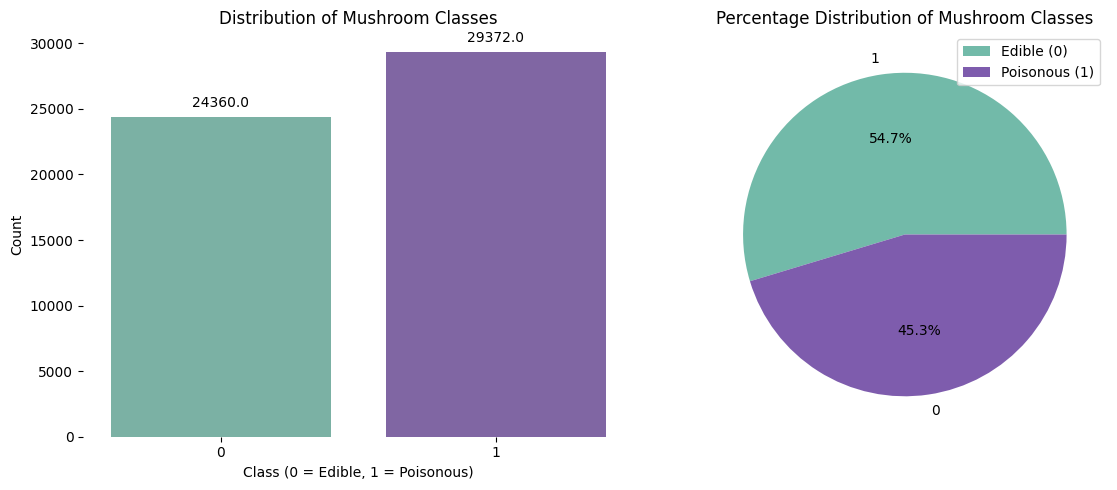

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Count the occurrences of each class (target)
class_counts = df_no_duplicates['class'].value_counts()

# Define custom colors
bar_colors = ['#72BAA9', '#7E5CAD'] 
pie_colors = ['#72BAA9', '#7E5CAD'] 

# Bar plot for class distribution
sns.barplot(x=class_counts.index, y=class_counts, ax=axes[0], palette=bar_colors)
axes[0].set_title('Distribution of Mushroom Classes')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Class (0 = Edible, 1 = Poisonous)')

for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', 
                     xytext=(0, 10), textcoords='offset points')

sns.despine(left=True, bottom=True)

# Pie chart for percentage distribution of classes
class_percentage = class_counts / class_counts.sum() * 100
axes[1].pie(class_percentage, labels=class_percentage.index, autopct='%1.1f%%', 
            colors=pie_colors)
axes[1].set_title('Percentage Distribution of Mushroom Classes')
plt.legend(['Edible (0)', 'Poisonous (1)'])
plt.tight_layout()
plt.show()


#### Class Distribution:

- The dataset contains **two classes**:
    - **0:** Edible mushrooms.
    - **1:** Poisonous mushrooms.
      
There are **more poisonous mushrooms** than edible ones in this dataset.

## Feature Distribution Visualization

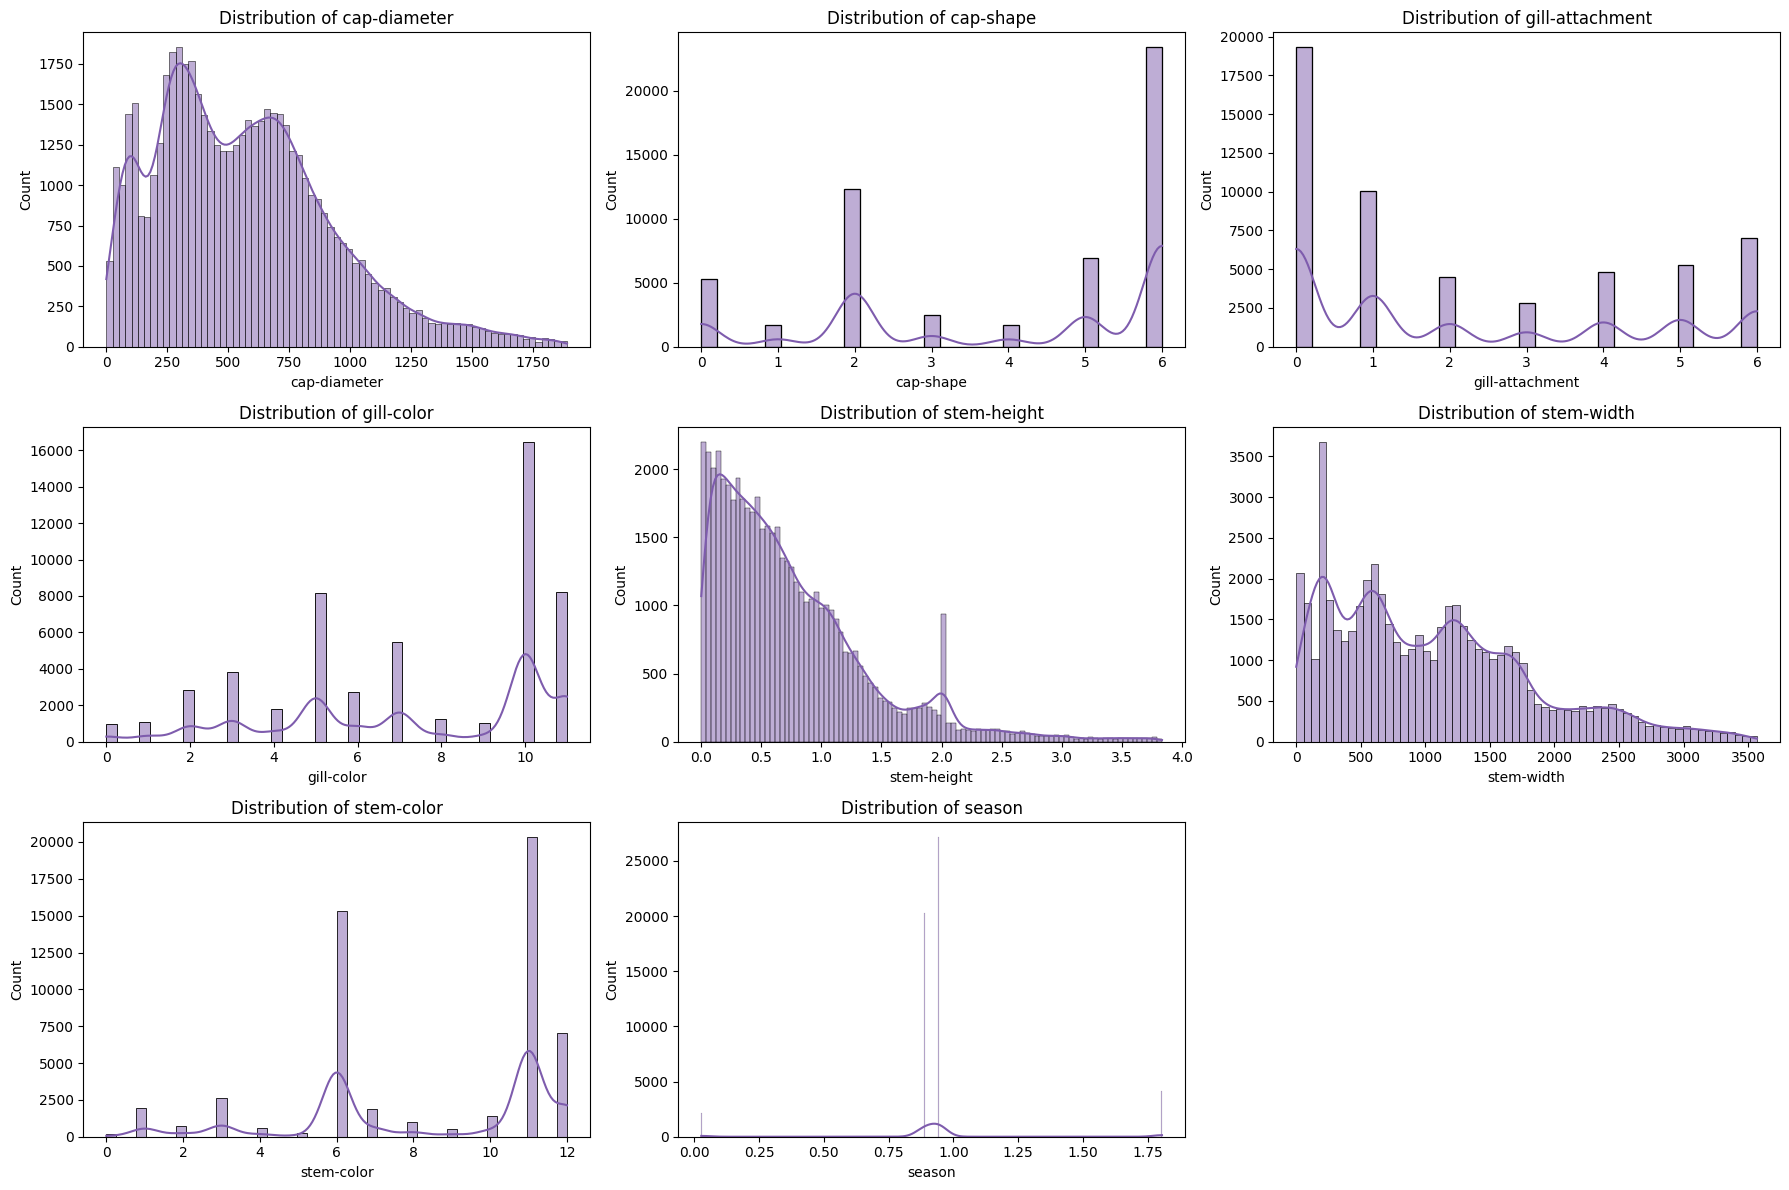

In [9]:
features_to_plot = df_no_duplicates.drop(columns=['class'])

# Create histograms for all features excluding the target column ('class') 
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(features_to_plot.columns):
    sns.histplot(data=features_to_plot, x=col, ax=axes[idx], kde=True, color='#7E5CAD')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)

for i in range(len(features_to_plot.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


#### Insights for Feature Distributions

1. **Cap Diameter**:
   - The distribution is **right-skewed**, with most values concentrated between **0 and 1000**.
   - A small number of instances have significantly larger cap diameters.

2. **Cap Shape**:
   - The distribution shows **distinct categories** with a small number of unique values.
   - Certain shapes are more frequent than others.

3. **Gill Attachment**:
   - **Categorical in nature**, with a limited set of values.
   - Some gill attachments are significantly more common.

4. **Gill Color**:
   - The distribution indicates that a few colors dominate.
   - Some gill colors are rare.

5. **Stem Height**:
   - The distribution is **right-skewed**, with most stem heights clustering around **0 to 2 units**.
   - There are few instances with taller stems.

6. **Stem Width**:
   - The distribution shows a **wide range**, with most values between **0 and 2000 units**.
   - A small number of mushrooms have very large stem widths.

7. **Stem Color**:
   - A limited set of stem colors, with a few colors appearing more frequently.
   - Certain colors are dominant in the dataset.

8. **Season**:
   - Only **4 unique values**, suggesting seasonal categories.
   - One or two seasons seem to be much more frequent.

These observations indicate that most features are a mix of **categorical and numerical data**, with varying levels of skewnow if further analysis is needed!

## Unique Values in Each Column

In [10]:
# Display the number of unique values in each column
print("\nUnique Values in Each Column:")
print(df_no_duplicates.nunique())


Unique Values in Each Column:
cap-diameter       1847
cap-shape             7
gill-attachment       7
gill-color           12
stem-height        1455
stem-width         3510
stem-color           13
season                4
class                 2
dtype: int64


#### Feature Classification into Continuous and Categorical

Based on the distributions and the nature of the data, here's a breakdown of which features can be considered **continuous** and **categorical**:

#### Continuous Features:
1. **cap-diameter**: measures the diameter of the mushroom cap.  
   - Wide range of unique values (1847).  
   - Numerical and varies continuously.

2. **stem-height**:   
   - Large range (1455 unique values).  
   - Represents continuous measurements.

3. **stem-width**: measures the width of the stem.  
   - Highest number of unique values (3510).  
   - Continuous numerical feature.

#### Categorical Features:
1. **cap-shape**: Bell, conical, convex, flat, sunken, spherical, others.  
   - Only 7 unique values, representing categories.

2. **gill-attachment**: Adnate, adnexed, decurrent, free, sinuate, pores, unknown. 
   - 7 unique values, indicating attachment types.

3. **gill-color**: Multiple color categories.  
   - 12 unique values, representing different gill colors.

4. **stem-color**: Multiple color categories.  
   - 13 unique values, representing different stem colors.

5. **season**: Spring, summer, autumn, winter.  
   - 4 unique values, representing different seasons.

#### Target Feature:
- **class**:  
  - Binary classification (0 = Edible, 1 = Poisonous).

#### Summary:

- **Continuous Features**: `cap-diameter`, `stem-height`, `stem-width`  
- **Categorical Features**: `cap-shape`, `gill-attachment`, `gill-color`, `stem-color`, `season`



## Feature Distribution by Class

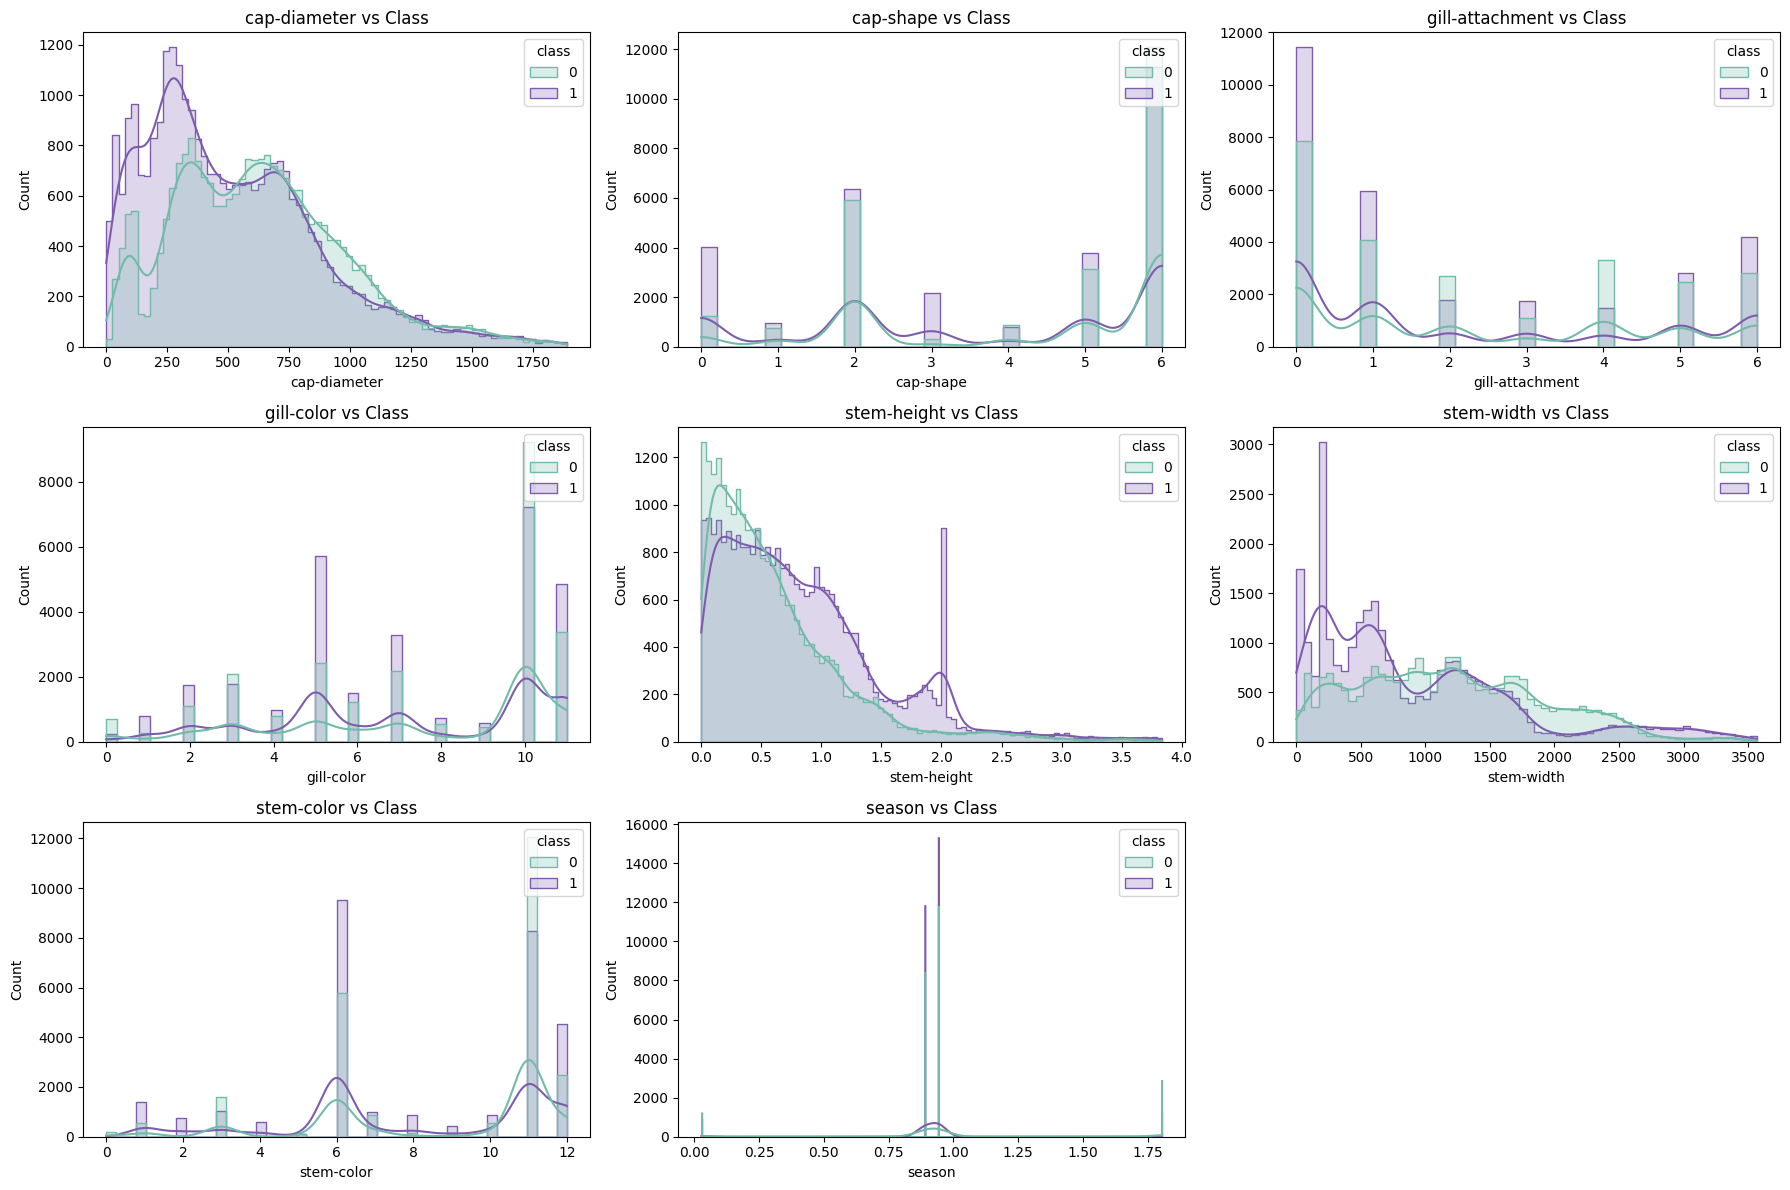

In [11]:
# Using the colors '#72BAA9' for Edible (0) and '#7E5CAD' for Poisonous (1)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

# Color palette for the two classes
colors = {0: '#72BAA9', 1: '#7E5CAD'}

for idx, col in enumerate(features_to_plot.columns):
    sns.histplot(data=df_no_duplicates, x=col, hue='class', ax=axes[idx], 
                 kde=True, palette=colors, element='step')
    axes[idx].set_title(f'{col} vs Class')
    axes[idx].set_xlabel(col)

for i in range(len(features_to_plot.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


### Insights for Feature Distributions vs. Target Class (`class`)

1. **Cap Diameter**:
   - **Observation**: Poisonous mushrooms tend to have a wider range of cap diameters compared to edible mushrooms.
   - **Insight**: Some overlap exists, but larger cap diameters are more commonly associated with poisonous mushrooms.

2. **Cap Shape**:
   - **Observation**: Specific cap shapes are more frequent for either edible or poisonous mushrooms.
   - **Insight**: Certain cap shapes, such as **convex** and **flat**, are prevalent in both classes, while others are more class-specific.

3. **Gill Attachment**:
   - **Observation**: Gill attachment types are unevenly distributed across the classes.
   - **Insight**: Some gill attachment types are more associated with poisonous mushrooms, while others appear predominantly in edible mushrooms.

4. **Gill Color**:
   - **Observation**: Poisonous mushrooms display a broader range of gill colors.
   - **Insight**: Darker or more distinct gill colors are more common among poisonous mushrooms.

5. **Stem Height**:
   - **Observation**: Poisonous mushrooms tend to have taller stems on average compared to edible ones.
   - **Insight**: While there is some overlap, mushrooms with very tall stems are more likely to be poisonous.

6. **Stem Width**:
   - **Observation**: Poisonous mushrooms exhibit a wider range of stem widths.
   - **Insight**: Very thin or very thick stems are more commonly associated with poisonous mushrooms.

7. **Stem Color**:
   - **Observation**: Poisonous mushrooms show a greater variety of stem colors.
   - **Insight**: Certain stem colors are predominantly seen in poisonous mushrooms, indicating a potential distinguishing factor.

8. **Season**:
   - **Observation**: Both edible and poisonous mushrooms appear in similar seasons.
   - **Insight**: While seasonality might not be a strong differentiating factor, certain seasons may have slight preferences for one class over the other.

### General Insights:
- **Class Separation**: Many features show overlapping distributions, but some ranges and categories are more frequent in one class.
- **Feature Importance**: Features like **cap diameter, gill color, stem height, and stem color** may serve as key indicators for distinguishing between edible and poisonous mushrooms.
- **Diversity**: Poisonous mushrooms generally exhibit a broader diversity in physical characterr analysis or specific recommendations!

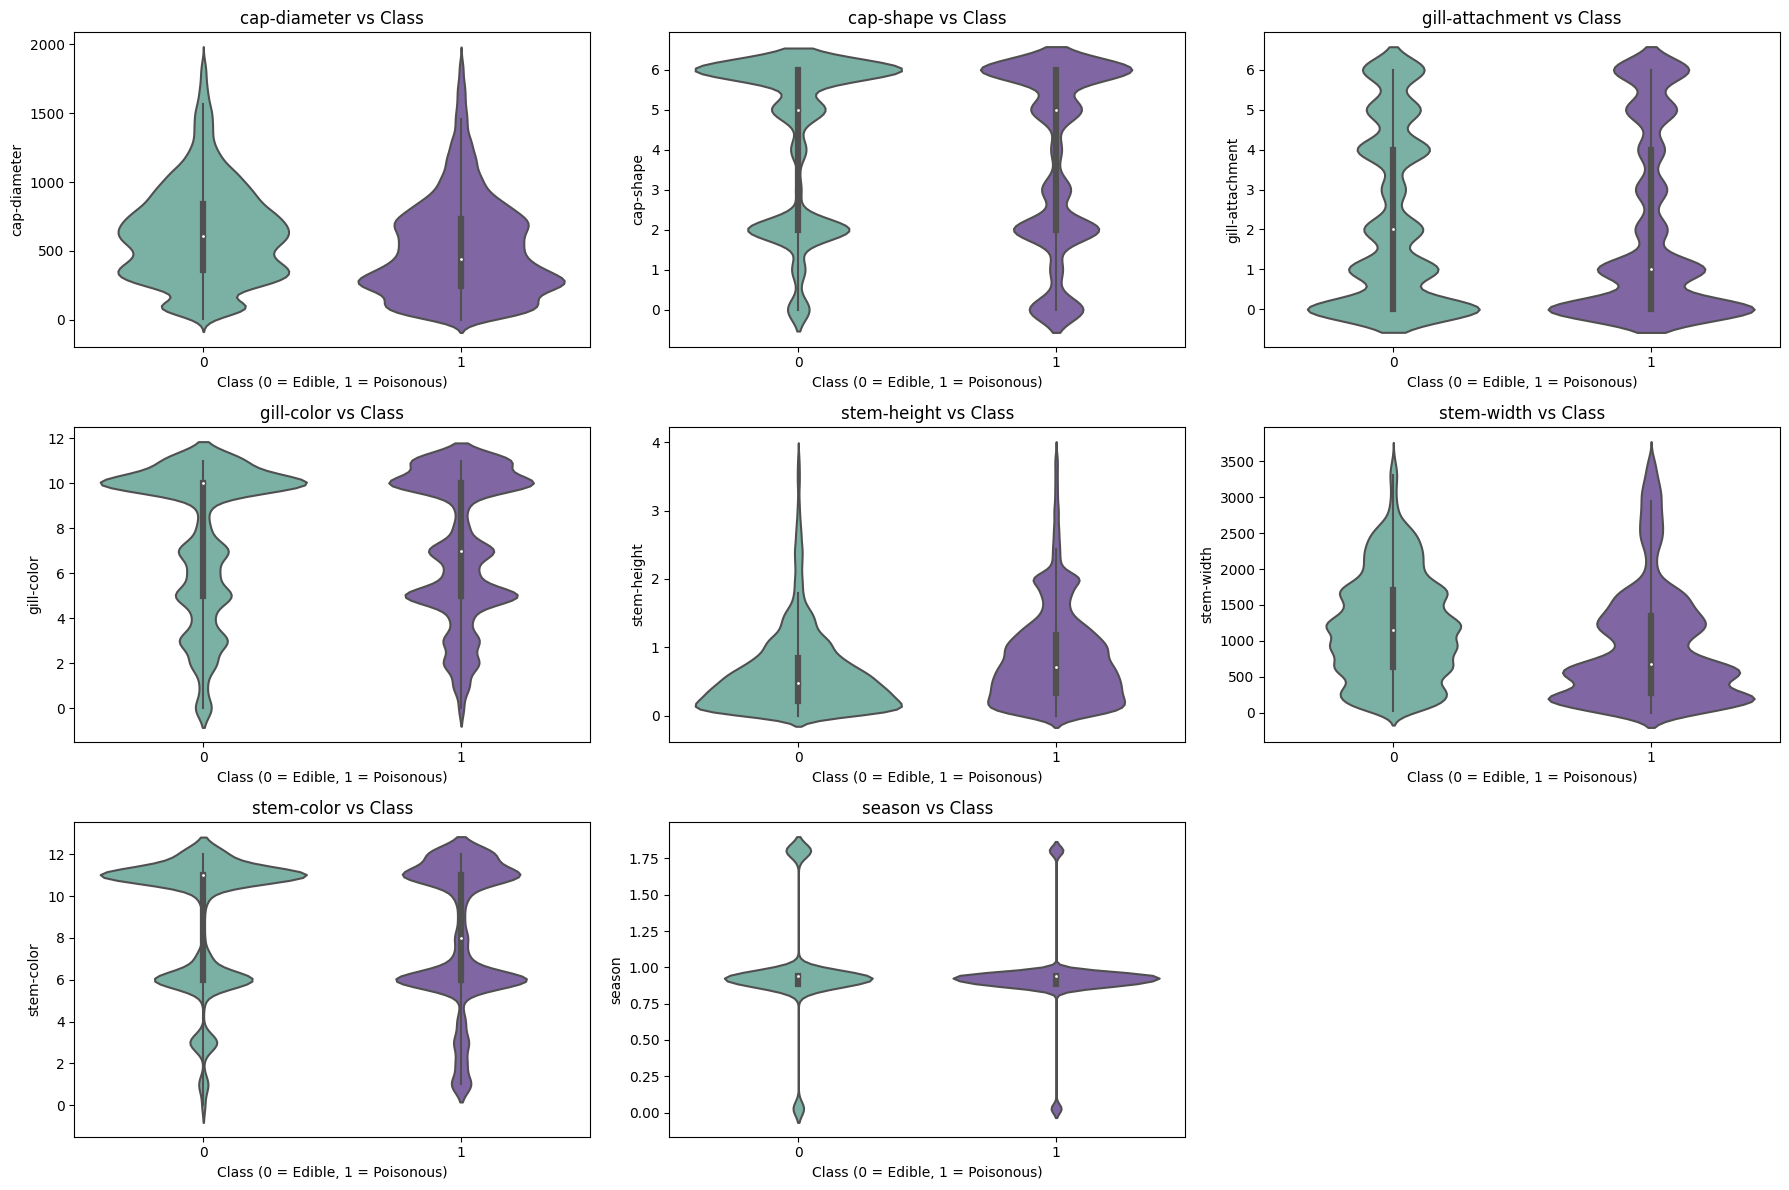

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

# Color palette for the two classes
colors = {0: '#72BAA9', 1: '#7E5CAD'}

# Create violin plots for each feature
for idx, col in enumerate(features_to_plot.columns):
    sns.violinplot(data=df_no_duplicates, x='class', y=col, ax=axes[idx], palette=colors)
    axes[idx].set_title(f'{col} vs Class')
    axes[idx].set_xlabel('Class (0 = Edible, 1 = Poisonous)')
    axes[idx].set_ylabel(col)

for i in range(len(features_to_plot.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

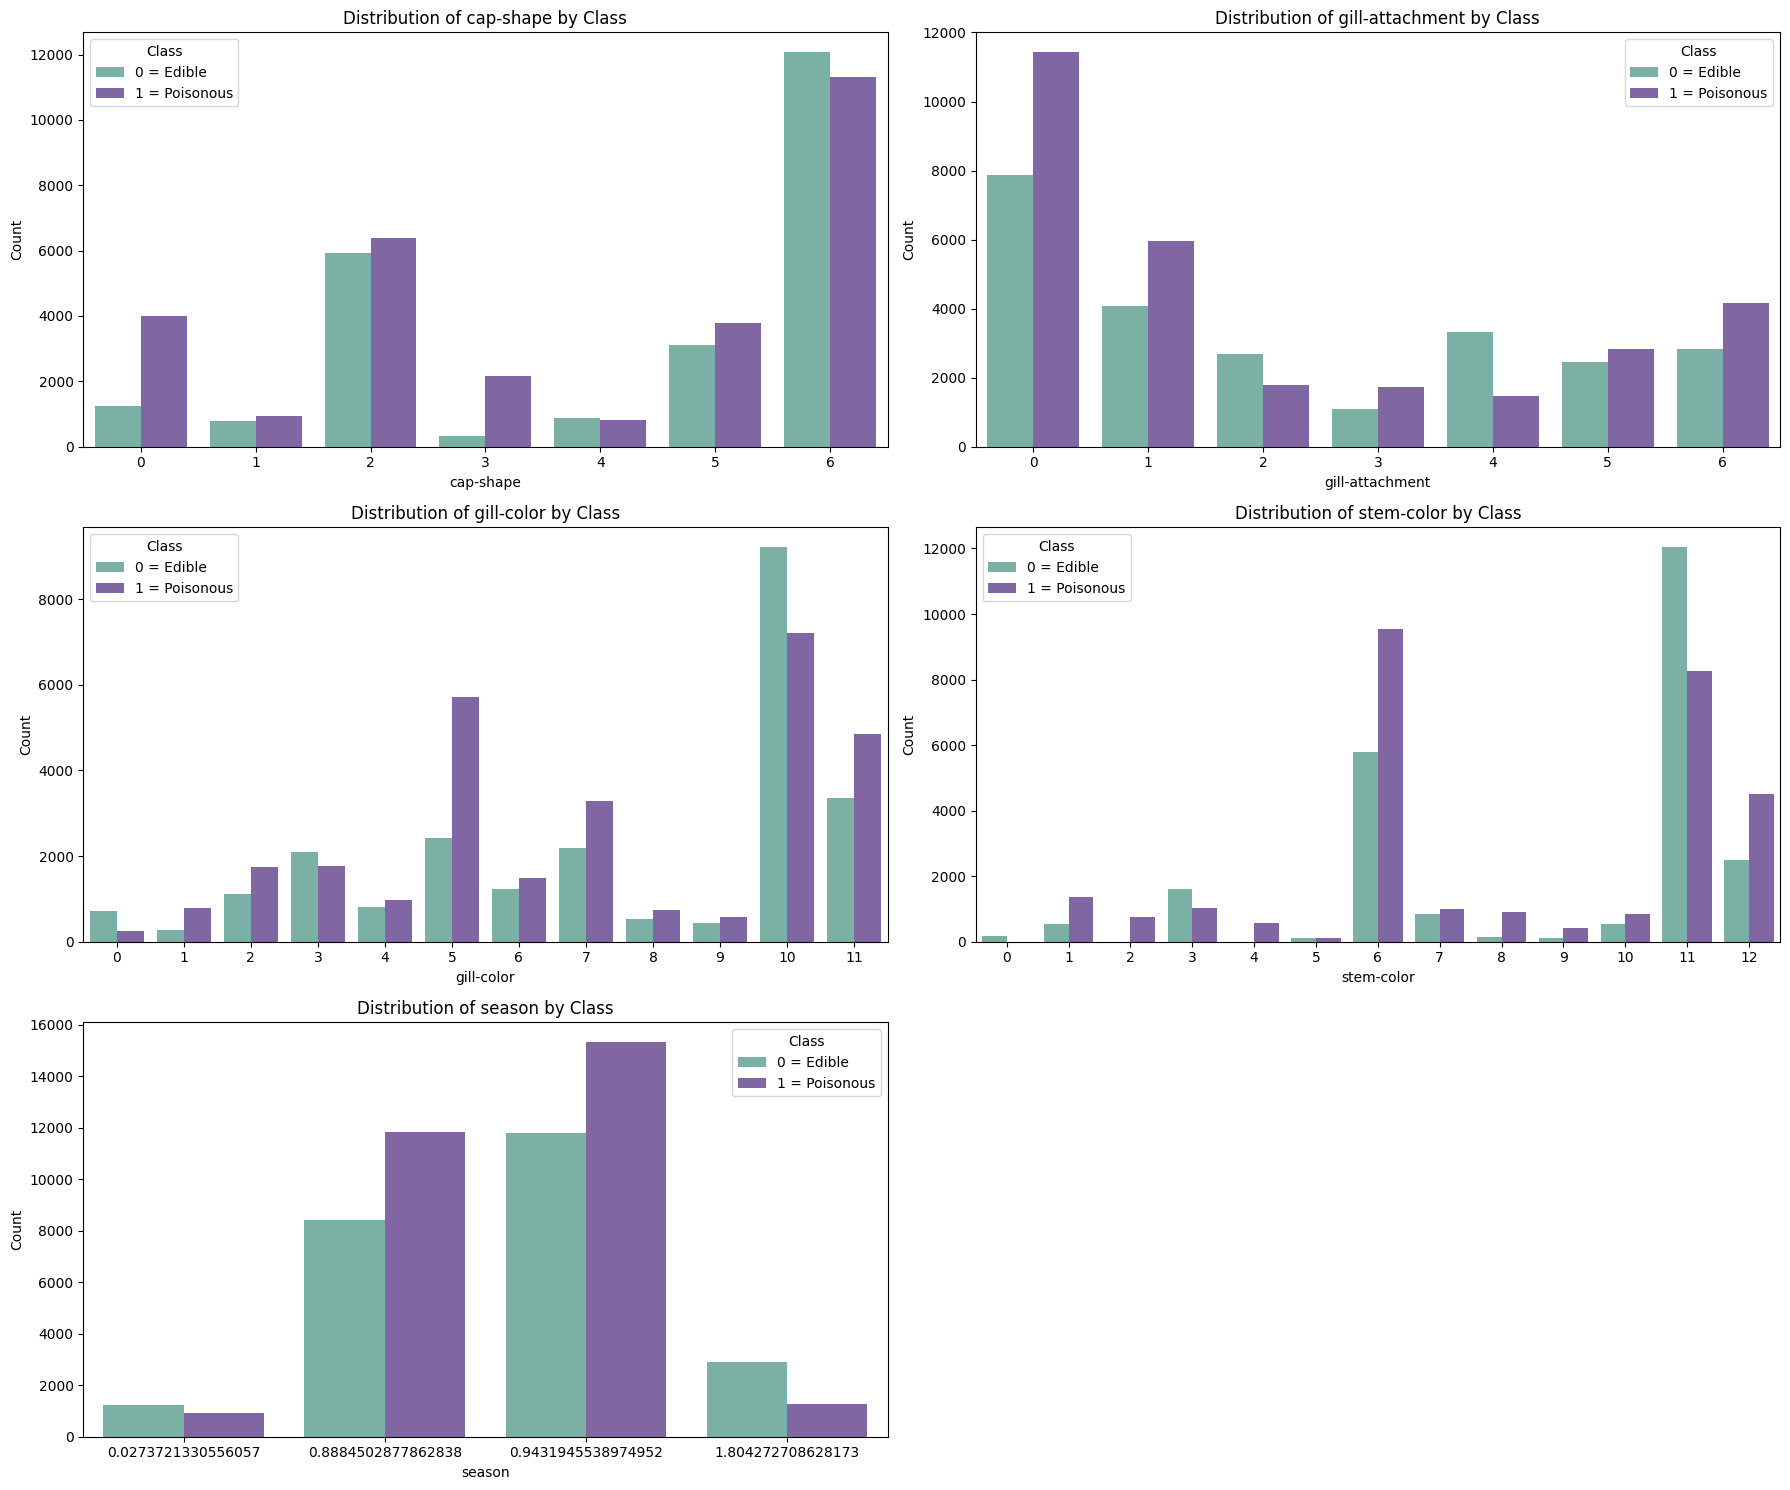

In [13]:
# Create a count plot to visualize the distribution of selected categorical features with hue by 'class'
categorical_features = ['cap-shape', 'gill-attachment', 'gill-color', 'stem-color', 'season']

# Set the figure size
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
axes = axes.flatten()

# Color palette for the two classes
colors = {0: '#72BAA9', 1: '#7E5CAD'}
labels = ['0 = Edible', '1 = Poisonous']

# Plot each feature
for idx, col in enumerate(categorical_features):
    sns.countplot(data=df_no_duplicates, x=col, hue='class', palette=colors, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col} by Class')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].legend(title='Class', labels=labels)

# Remove any empty subplot spaces
if len(categorical_features) < len(axes):
    for i in range(len(categorical_features), len(axes)):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


#### Overall Insights:
- **Gill Color** and **Stem Color** appear to be the most informative categorical features for distinguishing between edible and poisonous mushrooms.
- **Gill Attachment** (particularly the "free" attachment) can also be a helpful indicator.
- While **Cap Shape** and **Season** show some differences, they are less reliable on their own due to overlap between the two classes.

## Feature Correlation Heatmap

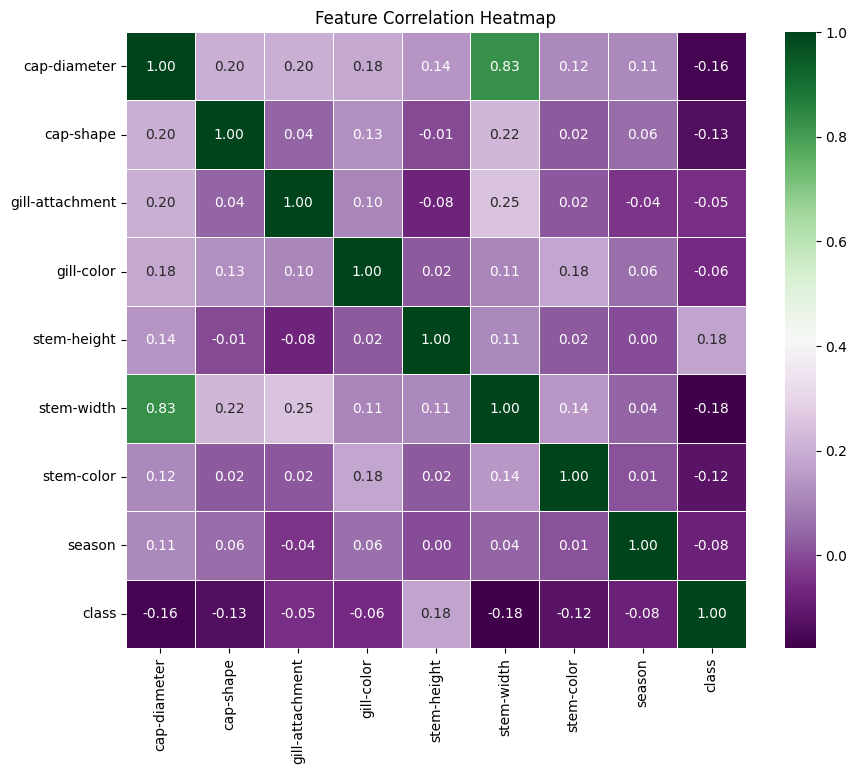

In [14]:
# Calculate the correlation matrix
correlation_matrix = df_no_duplicates.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PRGn', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


#### Correlation Insights for Mushroom Dataset


| **Feature Pair**                 | **Correlation Coefficient** | **Interpretation**                                      |
|----------------------------------|-----------------------------|--------------------------------------------------------|
| **Cap Diameter - Stem Width**    | 0.828                      | **Strong positive correlation**: Larger cap diameters are associated with thicker stems. |
| **Cap Diameter - Cap Shape**     | 0.203                      | **Weak positive correlation**: Slight relationship between cap diameter and cap shape.  |
| **Cap Diameter - Class**         | -0.163                     | **Weak negative correlation**: Larger cap diameters tend to be associated with edible mushrooms. |
| **Stem Width - Class**           | -0.177                     | **Weak negative correlation**: Thicker stems are slightly associated with edible mushrooms. |
| **Stem Height - Class**          | 0.176                      | **Weak positive correlation**: Taller stems are slightly associated with poisonous mushrooms. |
| **Gill Attachment - Stem Width** | 0.246                      | **Weak positive correlation**: Certain gill attachments are associated with thicker stems. |
| **Gill Color - Stem Color**      | 0.180                      | **Weak positive correlation**: Some gill colors are associated with specific stem colors. |



## Mean Feature Values by Class

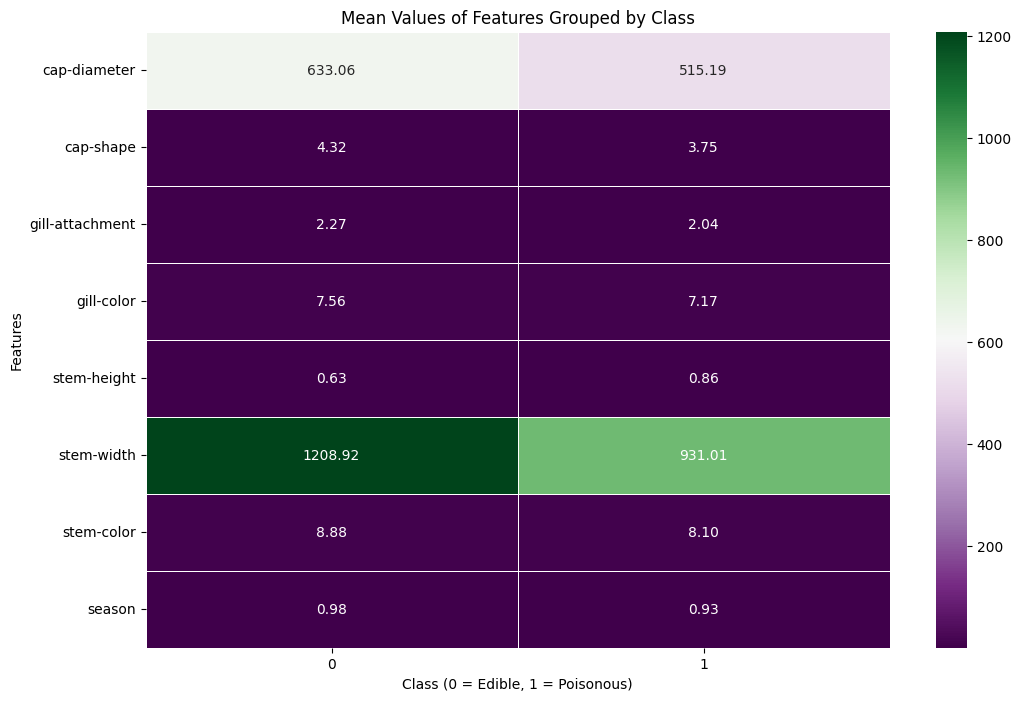

In [15]:
# Group by 'class' and calculate mean values for each feature
class_feature_means = df_no_duplicates.groupby('class').mean()

# Create a heatmap for the mean values of features by class
plt.figure(figsize=(12, 8))
sns.heatmap(class_feature_means.T, annot=True, cmap='PRGn', fmt=".2f", linewidths=0.5)
plt.title('Mean Values of Features Grouped by Class')
plt.xlabel('Class (0 = Edible, 1 = Poisonous)')
plt.ylabel('Features')
plt.show()


#### Heatmap Insights: Mean Values of Features Grouped by Class

1. **Cap Diameter**:
   - On average, **edible mushrooms** have a slightly larger cap diameter compared to poisonous mushrooms.

2. **Stem Width**:
   - **Edible mushrooms** tend to have wider stems on average than poisonous mushrooms.

3. **Stem Height**:
   - **Poisonous mushrooms** have taller stems compared to edible mushrooms.

4. **Gill Color**:
   - There are noticeable differences in average gill color values between the two classes, indicating potential distinguishing characteristics.

5. **Season**:
   - Both edible and poisonous mushrooms appear across similar seasons, with slight variations.

#### Key Observations:
- **Cap Diameter, Stem Width, and Stem Height** show the most significant differences between edible and poisonous mushrooms.



# <span style="color:transparent;">Data Preprocessing</span>

<div style="border-radius: 15px; border: 2px solid #8e44ad; padding: 20px; background: linear-gradient(135deg, #d9b3e6, #c39bd3, #8e44ad); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 10px; font-size: 36px; font-family: 'Roboto', sans-serif;">
        Data Preprocessing
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">


## Z-Score Calculation

In [16]:
# Calculate the z-scores for each column in the DataFrame
df_z_scores = df_no_duplicates.apply(zscore)

# Generate descriptive statistics for the z-scores, rounded to three decimal places
z_scores_stats = df_z_scores.describe().round(3)

# Displaying results in a readable format
print("Descriptive Statistics for Z-Scores:")
display(z_scores_stats)

Descriptive Statistics for Z-Scores:


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,53732.000,53732.000,53732.000,53732.000,53732.000,53732.000,53732.000,53732.000,53732.000
mean,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.578,-1.850,-0.960,-2.302,-1.164,-1.355,-2.613,-3.045,-1.098
25%,-0.773,-0.926,-0.960,-0.735,-0.746,-0.804,-0.758,-0.210,-1.098
50%,-0.113,0.459,-0.512,0.205,-0.252,-0.164,0.787,-0.030,0.911
75%,0.592,0.921,0.832,0.832,0.456,0.602,0.787,-0.030,0.911
max,3.669,0.921,1.728,1.146,4.773,3.219,1.096,2.804,0.911


#### Insights on Specific Features

- **Cap Diameter**: 
  - The range from -1.578 to 3.669 suggests that while most mushrooms have average cap diameters close to the mean, there are some with significantly larger caps (potentially outliers).

- **Stem Height**: 
  - With a maximum z-score of 4.773, this feature shows considerable variability and might indicate that some mushrooms have exceptionally tall stems compared to others.

- **Gill Attachment and Gill Color**: 
  - Both features have z-scores that hover around zero with relatively small ranges, indicating they are less variable compared to other features.

- **Season and Class**: 
  - The z-scores for categorical variables like `season` and `class` suggest that these features may not have been encoded in a way that reflects their variability effectively in this context.

## Outlier Detection and Removal

In [17]:
# Identify rows where any of the z-scores exceed the threshold (e.g., |z| > 3)
threshold = 3
outliers = (df_z_scores.abs() > threshold).any(axis=1)

# Filter the DataFrame to remove the outlier rows
df_no_outliers = df_no_duplicates[~outliers]

# Calculate the number of rows in the original DataFrame, the new one, and how many were removed
original_rows = df_no_duplicates.shape[0]
new_rows = df_no_outliers.shape[0]
removed_rows = original_rows - new_rows

print("\nSummary of Rows:")
print(f"Original number of rows: {original_rows}")
print(f"Number of rows after removing outliers: {new_rows}")
print(f"Number of rows removed: {removed_rows}")



Summary of Rows:
Original number of rows: 53732
Number of rows after removing outliers: 50131
Number of rows removed: 3601


## Skewness Calculation

In [18]:
# Calculate skewness for cap-diameter, stem-height, and stem-width
skewness_values = {
    'Feature': ['Cap Diameter', 'Stem Height', 'Stem Width'],
    'Skewness': [
        df_no_duplicates['cap-diameter'].skew(),
        df_no_duplicates['stem-height'].skew(),
        df_no_duplicates['stem-width'].skew()
    ]
}

skewness_df = pd.DataFrame(skewness_values)

# Display the DataFrame
display(skewness_df)

,Feature,Skewness
0,Cap Diameter,0.774528
1,Stem Height,1.495760
2,Stem Width,0.813577


## Log Transformation for Skewness Reduction

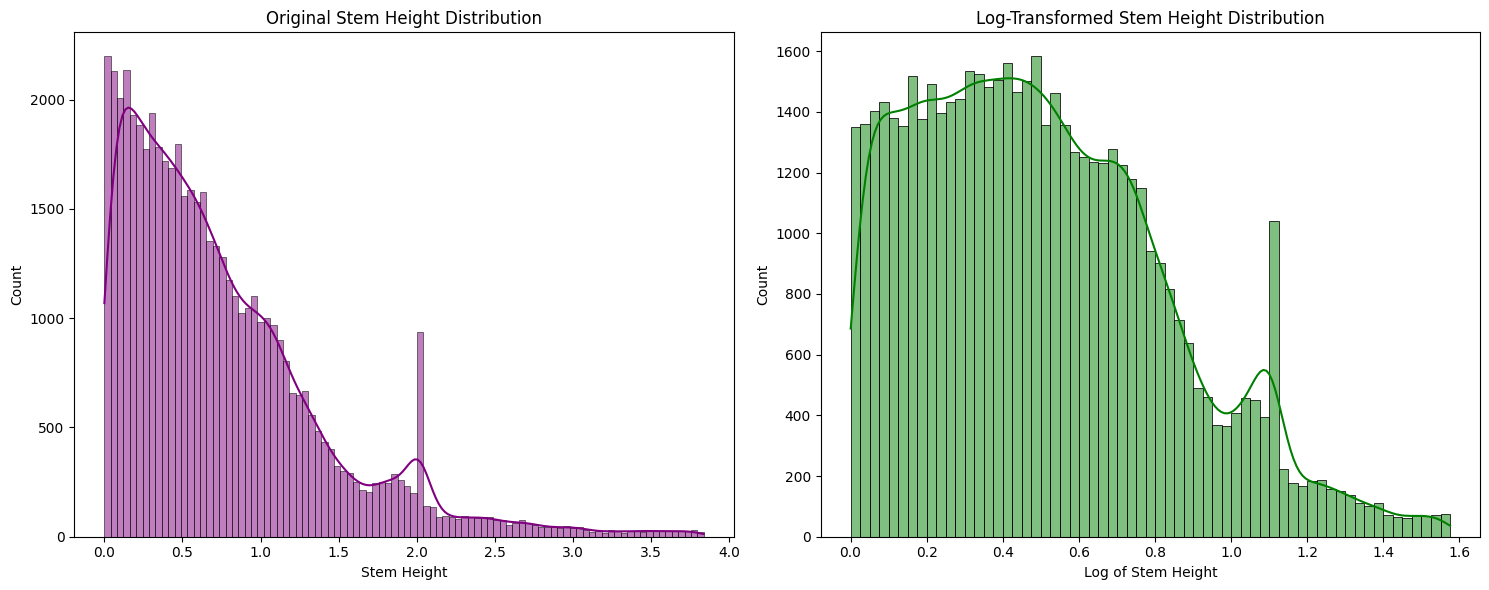

In [19]:
# Apply log transformation to 'stem-height'
df_no_duplicates['stem-height-log'] = np.log1p(df_no_duplicates['stem-height'])

# Set up the figure for before and after comparison
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Original stem-height distribution
sns.histplot(df_no_duplicates['stem-height'], kde=True, ax=axes[0], color='purple')
axes[0].set_title('Original Stem Height Distribution')
axes[0].set_xlabel('Stem Height')

# Log-transformed stem-height distribution
sns.histplot(df_no_duplicates['stem-height-log'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Log-Transformed Stem Height Distribution')
axes[1].set_xlabel('Log of Stem Height')

plt.tight_layout()
plt.show()


#### Observations:

1. **Before Transformation**:
   - The original **stem-height** distribution is **highly right-skewed**, with most values concentrated near the lower end and a long tail extending to the right.

2. **After Log Transformation**:
   - The **log-transformed** distribution is much more **symmetrical**, indicating that the skewness has been reduced.
   - Values are now spread more evenly, improving the distribution for potential modeling.

This transformation helps normalizeformations!

### Drop Original Stem Height

In [20]:
# Drop the original 'stem-height' column
df_no_duplicates.drop(columns=['stem-height'], inplace=True)

# Confirm the column is dropped
print(df_no_duplicates.columns)

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-width', 'stem-color', 'season', 'class', 'stem-height-log'],
      dtype='object')


## Separate Features and Target

In [21]:
# Separate Features and Target
X = df_no_duplicates.drop(columns=['class'])
y = df_no_duplicates['class']

## Data Scaling

In [22]:
# Data Scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Train/Test Split

In [23]:
# Train/Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Display shapes of the resulting datasets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (42985, 8)
Shape of X_test: (10747, 8)
Shape of y_train: (42985,)
Shape of y_test: (10747,)


# <span style="color:transparent;">Model Training and Evaluation</span>

<div style="border-radius: 15px; border: 2px solid #8e44ad; padding: 20px; background: linear-gradient(135deg, #d9b3e6, #c39bd3, #8e44ad); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 10px; font-size: 36px; font-family: 'Roboto', sans-serif;">
        Model Training and Evaluation
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">


## Hyperparameter Tuning with Optuna

In [24]:
# Define the objective function for Optuna
def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'tree_method': 'gpu_hist',  
        'eval_metric': 'auc',
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'lambda': trial.suggest_float('lambda', 0, 10),
        'alpha': trial.suggest_float('alpha', 0, 10)
    }

    # Cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    model = xgb.XGBClassifier(**params)

    auc_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='roc_auc')
    return np.mean(auc_scores)

# Run the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)


[I 2024-12-18 20:04:37,962] A new study created in memory with name: no-name-64a19182-c025-456d-943e-a458c5414c4d
[I 2024-12-18 20:04:42,983] Trial 0 finished with value: 0.9981678759436997 and parameters: {'max_depth': 10, 'learning_rate': 0.10983193439399702, 'n_estimators': 969, 'subsample': 0.8276314679223123, 'colsample_bytree': 0.7713007455796054, 'gamma': 2.3201660352922167, 'lambda': 2.812220535089053, 'alpha': 7.681957182500435}. Best is trial 0 with value: 0.9981678759436997.
[I 2024-12-18 20:04:43,940] Trial 1 finished with value: 0.9859804159358021 and parameters: {'max_depth': 4, 'learning_rate': 0.1932130930626992, 'n_estimators': 124, 'subsample': 0.9735747472341345, 'colsample_bytree': 0.7303525402207038, 'gamma': 4.321480149381793, 'lambda': 2.589586999453851, 'alpha': 8.242305998048634}. Best is trial 0 with value: 0.9981678759436997.
[I 2024-12-18 20:04:47,299] Trial 2 finished with value: 0.9972276898892535 and parameters: {'max_depth': 6, 'learning_rate': 0.2565681

Best Hyperparameters: {'max_depth': 9, 'learning_rate': 0.2188282629839265, 'n_estimators': 827, 'subsample': 0.7711652041964898, 'colsample_bytree': 0.9734685789560468, 'gamma': 0.6772988180823565, 'lambda': 1.7942789095127072, 'alpha': 0.02489273587177876}


## Train the Final Model with Best Hyperparameters

In [25]:
# Train the final model with the best hyperparameters
final_model = xgb.XGBClassifier(**best_params, tree_method='gpu_hist', use_label_encoder=False, eval_metric='auc')

## Cross-Validation to Evaluate Performance

In [26]:
# Cross-validation to evaluate performance
cv_scores = cross_val_score(final_model, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Cross-Validation AUC Scores: {cv_scores}")
print(f"Mean CV AUC: {np.mean(cv_scores):.3f}")


Cross-Validation AUC Scores: [0.99942315 0.99936239 0.9995182  0.9993213  0.99923995]
Mean CV AUC: 0.999


- The model demonstrates exceptional performance during cross-validation, indicating high generalization capability.

## Model Training on Entire Training Set

In [27]:
# Train the final model on the entire training set
final_model.fit(X_train, y_train)

XGBClassifier(alpha=0.02489273587177876, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9734685789560468, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=0.6772988180823565,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=1.7942789095127072,
              learning_rate=0.2188282629839265, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=827, n_jobs=None, ...)

## Model Evaluation on Test Data

In [28]:
# Predict on the test data
y_pred = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nTest Accuracy: {accuracy:.3f}")
print(f"Test AUC: {auc:.3f}")


Test Accuracy: 0.989
Test AUC: 0.999


- These metrics confirm that the model performs very well on unseen data, achieving near-perfect classification.

## Classification Report and Confusion Matrix


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4872
           1       0.99      0.99      0.99      5875

    accuracy                           0.99     10747
   macro avg       0.99      0.99      0.99     10747
weighted avg       0.99      0.99      0.99     10747



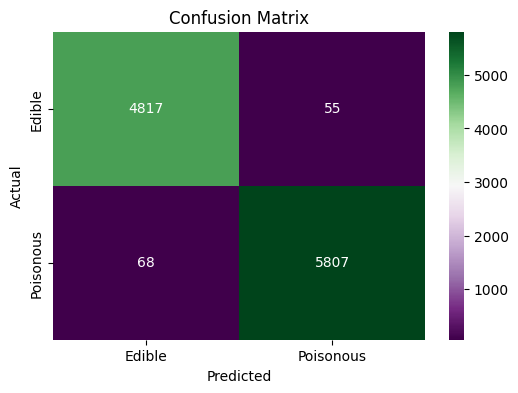

In [29]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='PRGn', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- Precision: The model is very accurate in predicting both edible and poisonous mushrooms.
- Recall: The model successfully identifies 99% of both edible and poisonous mushrooms.
- F1-Score: Indicates a perfect balance between precision and recall.

#### Observations:

- The model has a low error rate, with only 55 false positives and 68 false negatives out of 10,747 predictions.
- This is critical for safety, as minimizing false negatives (misclassifying poisonous mushrooms as edible) is particularly important.

## Feature Importance Visualization

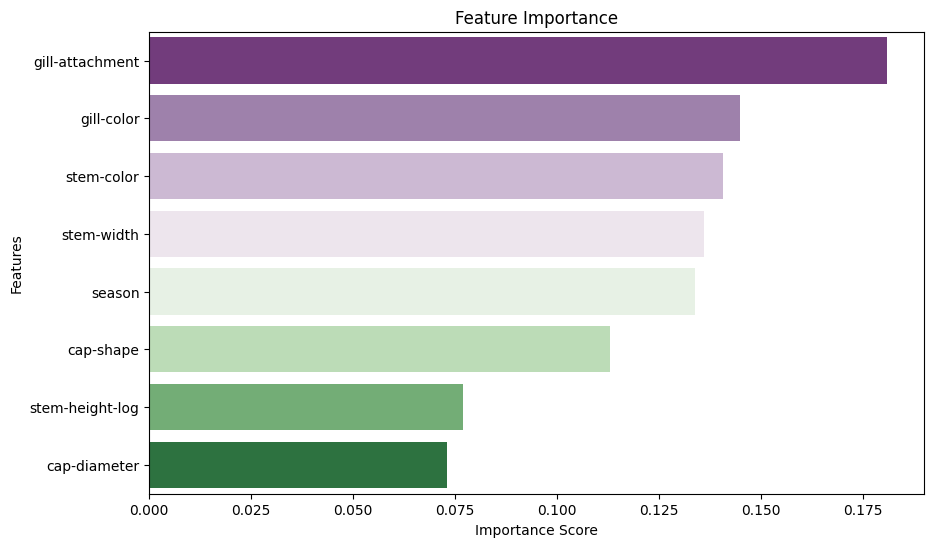

In [30]:
# Feature Importance
feature_importance = final_model.feature_importances_
feature_names = df_no_duplicates.drop(columns=['class']).columns

# Create a DataFrame for visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='PRGn')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

#### **Feature Importance**

1. **Gill Attachment**:  
   - The most important feature, indicating that the way gills attach to the stem plays a significant role in classification.

2. **Stem Color**:  
   - Highly influential in determining mushroom edibility, suggesting certain colors are strongly associated with poisonous mushrooms.

3. **Cap Shape** and **Stem Width**:  
   - These physical characteristics contribute meaningfully to classification.

4. **Gill Color** and **Season**:  
   - Moderate importance; the seasonal occurrence and gill color add contextual information.

5. **Stem Height (Log-Transformed)** and **Cap Diameter**:  
   - Contribute less but still provide valuable information.

<div style="border-radius: 10px; border: 2px solid #8e44ad; padding: 20px; background-color: #e8d6eb; text-align: left; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3);">
    <h3 style="color: #8e44ad; font-weight: bold; font-family: 'Roboto', sans-serif;">
        📝 Summary
    </h3>
    <ul style="color: #333333; font-size: 16px; font-family: 'Roboto', sans-serif;">
        <li>The <strong>XGBoost model</strong> with optimized hyperparameters delivers <strong>excellent performance</strong> with a test accuracy of <strong>98.9%</strong> and an AUC of <strong>99.9%</strong>.</li>
        <li>The model is highly reliable, making very few mistakes, which is crucial for distinguishing between <strong>edible</strong> and <strong>poisonous mushrooms</strong>.</li>
        <li><strong>Gill attachment</strong>, <strong>stem color</strong>, and <strong>cap shape</strong> are the most critical features for classification.</li>
    </ul>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400&display=swap" rel="stylesheet">


<div style="border-radius: 15px; border: 2px solid #8e44ad; padding: 20px; background: linear-gradient(135deg, #d9b3e6, #c39bd3, #8e44ad); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 10px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        🙏 Thank You for Reading the Notebook!
    </h1>
    <p style="color: #ffffff; font-size: 18px; text-align: center;">
        Your support is truly appreciated. If you found this helpful, feel free to upvote and leave feedback.
    </p>
    <p style="color: #ffffff; font-size: 18px; text-align: center;">
        Happy Coding! 🙌😊
    </p>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">
